loaded prior SLP predictor


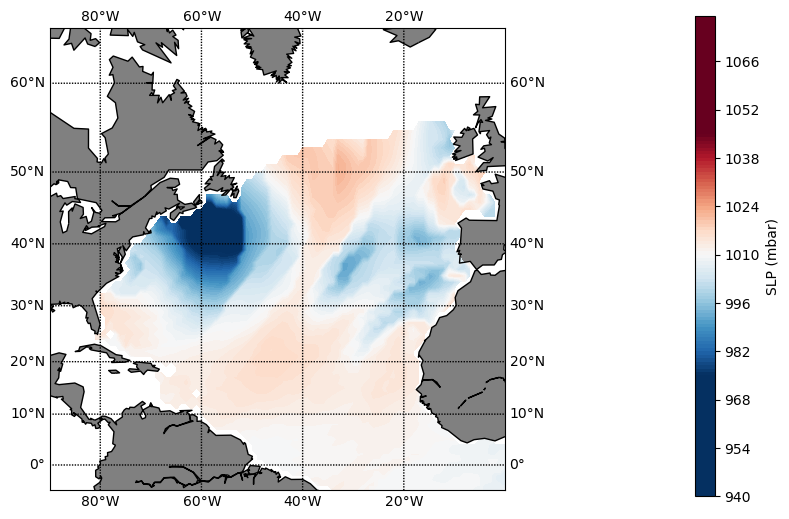

In [1]:
import os
import sys
sys.path.insert(0, '/Users/dylananderson/Documents/projects/gencadeClimate/')

from weatherTypes import weatherTypes
import plotting
from metOcean import getMetOcean
from climateIndices import climateIndices
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os
import pickle
import sys

savePath = '/volumes/macDrive/va/'
slpPath = '/volumes/macDrive/prmsl/'
wisPath = '/volumes/macDrive/WIS63142/'
wlPath = '/users/dylananderson/documents/data/frfWaterLevel/'
startTime = [1979, 2, 1]
endTime = [2024, 9, 30]
slpMemory = True

wts = weatherTypes(slpPath=slpPath,startTime=startTime,endTime=endTime,savePath=savePath, slpMemory=slpMemory,avgTime=12,resolution=1,
                   latBot=-5,latTop=65,lonRight=0,basin='atlantic')

wts.extractCFSR(loadPrior=True,loadPickle='/volumes/macDrive/va/slps12hr1degRes.pickle')
plotting.plotSlpExample(struct=wts)


loaded prior PCA processing


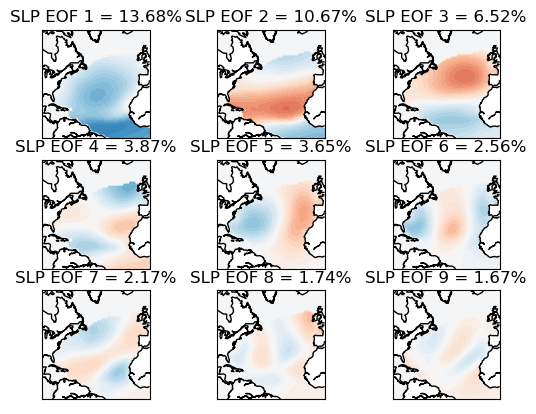

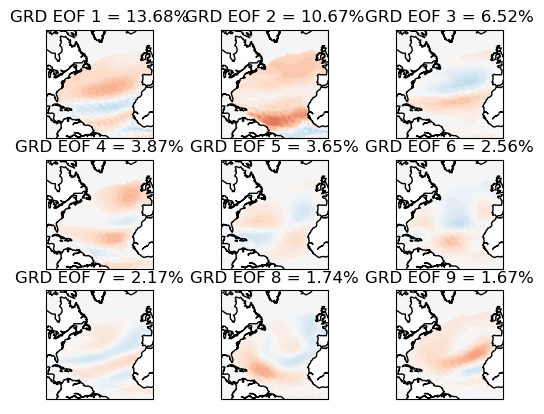

In [2]:
wts.pcaOfSlps(loadPrior=True,loadPickle='/volumes/macDrive/va/pcas12hr1degRes.pickle')
plotting.plotEOFs(struct=wts)


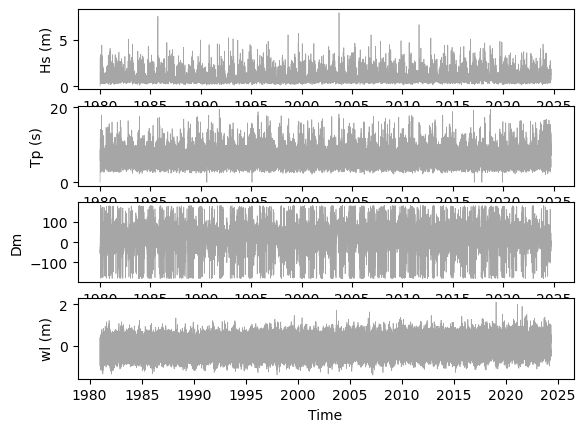

In [3]:

metOcean = getMetOcean(wlPath=wlPath,wisPath=wisPath,startTime=startTime,endTime=endTime,shoreNormal=155)

stormPickle = '/users/dylananderson/Documents/projects/frf_python_share/stormHs95Over12Hours.pickle'
with open(stormPickle, "rb") as input_file:
    inputStorms = pickle.load(input_file)

metOcean.timeWave = inputStorms['combinedTimeWIS']
metOcean.Hs = inputStorms['combinedHsWIS']
metOcean.Tp = inputStorms['combinedTpWIS']
metOcean.Dm = inputStorms['combinedDmWIS']
metOcean.getWaterLevels()
plotting.plotOceanConditions(struct=metOcean)


loaded prior DWT processing


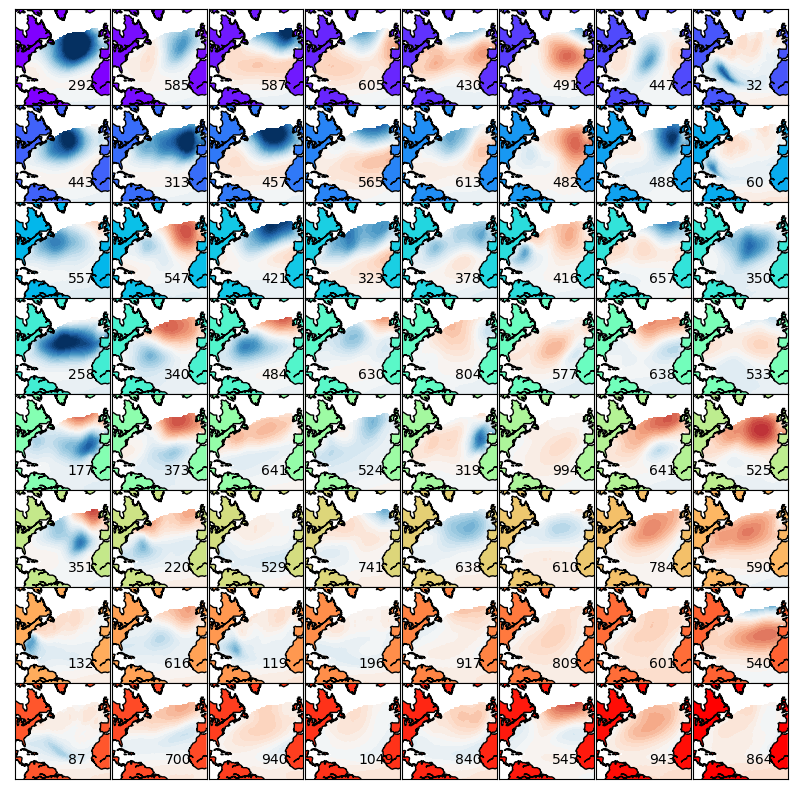

In [4]:
wts.wtClusters(numClusters=64,minGroupSize=30,TCs=False,RG='waves',Basin=b'NA',alphaRG=0.2,met=metOcean,loadPrior=True,
               loadPickle=os.path.join(savePath,'dwts12hr1degRes64withRG02.pickle'))
plotting.plotWTs(struct=wts,withTCs=False)

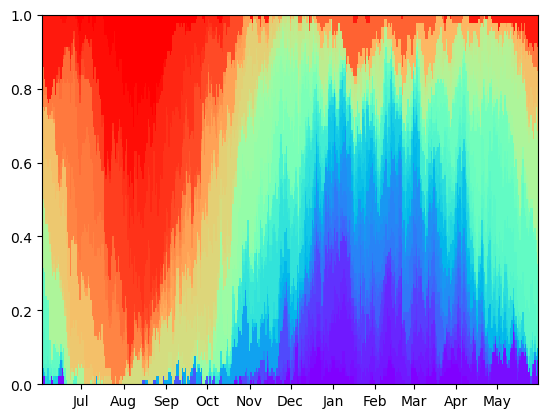

In [5]:
plotting.plotSeasonal(struct=wts)

In [6]:
#wts.separateHistoricalHydrographs(metOcean=metOcean)
#wts.metOceanCopulas()